<a href="https://colab.research.google.com/github/benedictusdps/DataCamp-Applied-Finance/blob/main/1.%20Univariate_Investment_Risk_and_Returns_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Read the csv from Github and sort the values by date
StockPrices = pd.read_csv('https://raw.githubusercontent.com/benedictusdps/DataCamp-Applied-Finance/main/TSLA.csv', parse_dates=['Date'])
StockPrices = StockPrices.sort_values(by='Date')
StockPrices.set_index('Date', inplace=True)
print(StockPrices.head())

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2021-01-04  719.460022  744.489990  ...  729.770020  48638200
2021-01-05  723.659973  740.840027  ...  735.109985  32245200
2021-01-06  758.489990  774.000000  ...  755.979980  44700000
2021-01-07  777.630005  816.989990  ...  816.039978  51498900
2021-01-08  856.000000  884.489990  ...  880.020020  75055500

[5 rows x 6 columns]


In [20]:
# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adj Close'].pct_change()
print(StockPrices.head())

                  Open        High         Low  ...   Adj Close    Volume   Returns
Date                                            ...                                
2021-01-04  719.460022  744.489990  717.190002  ...  729.770020  48638200       NaN
2021-01-05  723.659973  740.840027  719.200012  ...  735.109985  32245200  0.007317
2021-01-06  758.489990  774.000000  749.099976  ...  755.979980  44700000  0.028390
2021-01-07  777.630005  816.989990  775.200012  ...  816.039978  51498900  0.079447
2021-01-08  856.000000  884.489990  838.390015  ...  880.020020  75055500  0.078403

[5 rows x 7 columns]


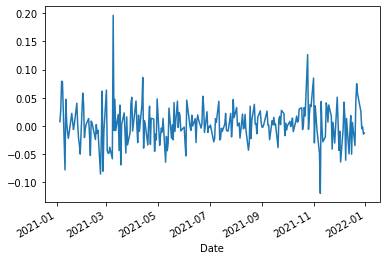

In [21]:
# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

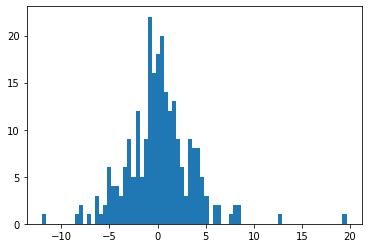

In [22]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns'] * 100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75)
plt.show()

In [24]:
# Calculate the amount of trading days in a year
trading_days = StockPrices['Adj Close'].count().item()
print(trading_days)

252


In [25]:
# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print("Average daily return: ", mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1 + mean_return_daily)**trading_days) - 1
print("Implied annualized average return: ", mean_return_annualized)

Average daily return:  0.0020610826683574454
Implied annualized average return:  0.6801083930046332


In [26]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print("Daily standard deviation: ", sigma_daily)

# Calculate the daily variace
variance_daily = sigma_daily**2
print("Daily variance: ", variance_daily)

Daily standard deviation:  0.03443489688416579
Daily variance:  0.0011857621234231308


In [27]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*trading_days**(1/2)
print("Annualized standard deviation: ", sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized ** 2
print("Annualized variance: ", variance_annualized)

Annualized standard deviation:  0.5466370414659337
Annualized variance:  0.2988120551026289


In [28]:
# Skewness
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print("Skewness: ", returns_skewness)

Skewness:  0.6632926992622179


In [29]:
# Kurtosis
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print("Excess kurtosis: ", excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print("True fourth moment: ", fourth_moment)

Excess kurtosis:  4.347801434609588
True fourth moment:  7.347801434609588


In [30]:
# Statistical tests for normality
# Using the Shapiro-Wilk test of normality
# Import shapiro from scipy-stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock return
shapiro_results = shapiro(clean_returns)
print("Shapiro results: ", shapiro_results)

# Extract the p_value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results:  (0.9527833461761475, 2.7854076734001865e-07)
P-value:  2.7854076734001865e-07
